In [1]:
import sympy as sp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from optimizers import SaddlePoint

## Naive Gradient Descent
### Successful example on $f(x,y) = x^2 - y^2$

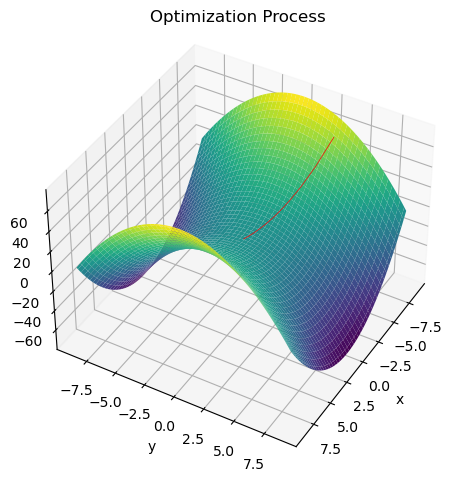

In [2]:
# Define the Sympy expression for the function
x, y = sp.symbols('x y', real=True)
func = x**2 - y**2

# Create an instance of the SaddlePoint class
f = SaddlePoint(func)

# Call the optimizer and the plot methods
f.optimize(xy_init=[-8,3], algo ='naive_gradient', eta=0.1, max_steps=1e4, tolerance=1e-5)
f.plot(40, 30)

### Unsuccessful example on $f(x,y) = xy$

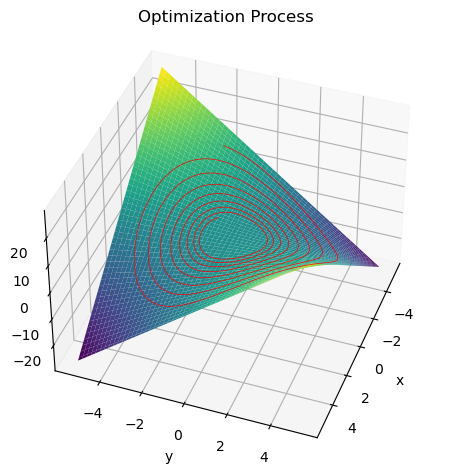

Text(0, 0.5, 'Gradient Norm')

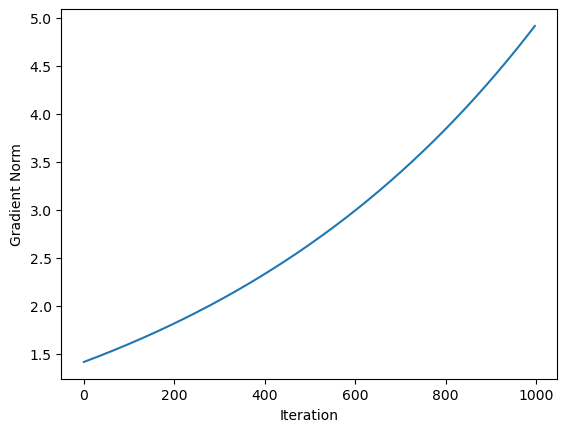

In [11]:
# Define the Sympy expression for the function
x, y = sp.symbols('x y', real=True)
func = x*y

# Create an instance of the SaddlePoint class
g = SaddlePoint(func)

# Call the optimizer and the plot methods
g.optimize(xy_init=[-1,-1], algo ='naive_gradient', eta=0.05, max_steps=1e3, tolerance=1e-5)
g.plot(40, 20)

plt.plot(np.linalg.norm(g.history[:,1:999], axis=0))
# add xlabel
plt.xlabel('Iteration')
# add ylabel
plt.ylabel('Gradient Norm')


## Implicit Gradient Descent

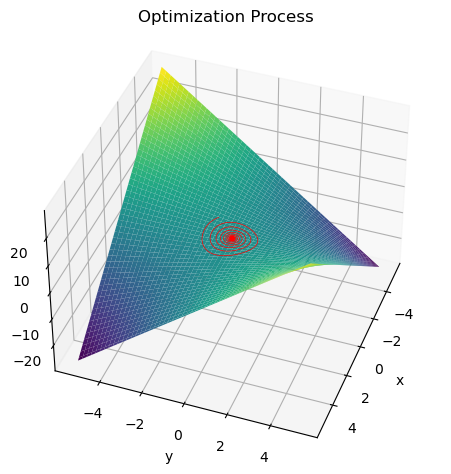

In [14]:
# Define the Sympy expression for the function
x, y = sp.symbols('x y', real=True)
func = x*y

# Create an instance of the SaddlePoint class
h = SaddlePoint(func)

# Call the optimizer and the plot methods
h.optimize(xy_init=[-1,-1], algo ='implicit_gradient', eta=0.1, max_steps=1e4, tolerance=np.finfo(float).eps)


reach = np.max(np.abs(g.history))
# Extract the x and y values from the optimization history
x_values = h.history[0, :]
y_values = h.history[1, :]
x, y = sp.symbols('x y', real=True)

# Create a callable function for the expression self.L
func_callable = sp.lambdify((x, y), h.L, modules='numpy')

# Define the range of x and y values for plotting based on data
x_range = np.linspace(-1.1 * reach, 1.1 * reach, 100)
y_range = np.linspace(-1.1 * reach, 1.1 * reach, 100)

# Create a meshgrid from the x and y ranges
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Evaluate the function at each point of the meshgrid
f_mesh = func_callable(x_mesh, y_mesh)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
ax.plot_surface(x_mesh, y_mesh, f_mesh, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L')
ax.set_title('Optimization Process')

# Set the perspective of the plot
ax.view_init(elev=40, azim=20)

# Extract the x, y, and z values from the optimization history
f_values = func_callable(x_values, y_values)

# Plot the path traced by z during optimization as shaded spheres
ax.plot(x_values, y_values, f_values, c='r', linewidth=0.5, zorder=10)

# Show the plot
plt.tight_layout()  # Prevent overlap of labels
plt.show()